In [37]:
%matplotlib ipympl

In [38]:
from impedance.preprocessing import readBioLogic
from impedance.models.circuits import CustomCircuit
import matplotlib.pyplot as plt
import numpy as np
from models import *
import mpmath as mp

In [39]:
f,z=readBioLogic("RM_stacked second run S3_1_C03.mpt")

In [ ]:
Rsep=100
R1=1000
Q=1e-4
alpha=1
c=CustomCircuit(initial_guess=[Rsep,R1,Q,alpha],circuit="R_1-TLMuni")


# wt=np.concatenate((np.real(z),np.imag(z)))
# print("hstack",wt_hstack)


mp.dps=200
c.fit(impedance=z,frequencies=f,bounds=((0,0,0,0.9),(np.inf,np.inf,np.inf,1)))

c_fitted=CustomCircuit(initial_guess=[c.parameters_[0],c.parameters_[1],c.parameters_[2],c.parameters_[3]],circuit="R_1-TLMuni")
z_fitted=c_fitted.predict(frequencies=f)

In [77]:
print(c_fitted)


Circuit string: R_1-TLMuni
Fit: False

Initial guesses:
    R_1 = 1.61e+02 [Ohm]
  TLMuni_0 = 4.99e+02 [Ohm]
  TLMuni_1 = 4.89e-03 [F]
  TLMuni_2 = 9.59e-01 []



(0.0, 1500.0)

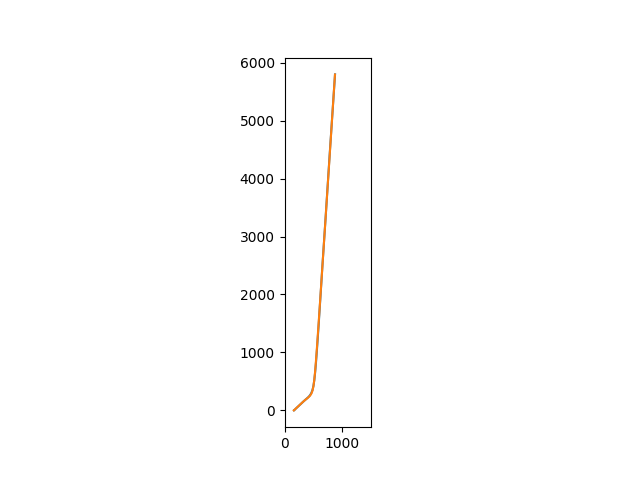

In [84]:
fig, ax=plt.subplots()
ax.plot(np.real(z),-np.imag(z))
ax.plot(np.real(z_fitted),-np.imag(z_fitted))
ax.set_aspect("equal")
ax.set_xlim(0,1500)
# ax.tick_params()